# Function usage bevhaviour analysis

Analysis of the usage of the function in the customer configurations. This should help to understand the most common usage of the function and to identify the most common patterns.

Read all files and create a combined dataframe

In [1]:
import pandas as pd

df = pd.read_csv("/workspace/data/functions/functions.csv")

# Sort DataFrame by frequency
df_s = df.sort_values(by="Frequency", ascending=False)
df_s

,FunctionName,Frequency,FilteredFrequency,Category,Source
1,ISNULLOREMPTY,17241,7880,logical_functions,DevExpress
0,TOSTR,7268,3043,string_functions,DevExpress
8,ITEMSTOTEXT,6536,3382,aggregate_functions,Soloplan
11,IIF,5699,2635,logical_functions,DevExpress
6,CONTAINS,4255,2704,string_functions,DevExpress
...,...,...,...,...,...
140,CONTENT,1,0,unknown_functions,unknown
81,KOMPLETT,1,1,unknown_functions,unknown
155,GLUTEN,1,1,unknown_functions,unknown
143,TERMIN,1,0,unknown_functions,unknown


In [2]:
df_s.groupby("Source").count()

,FunctionName,Frequency,FilteredFrequency,Category
Source,,,,
DevExpress,105,105,105,105
Soloplan,41,41,41,41
unknown,36,36,36,36


## Plots for the TOP N functions

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

TOP_N = 10


# Sort the data
freq_top_n = df.sort_values(by="Frequency", ascending=False).head(TOP_N)
f_freq_top_n = df.sort_values(by="FilteredFrequency", ascending=False).head(TOP_N)

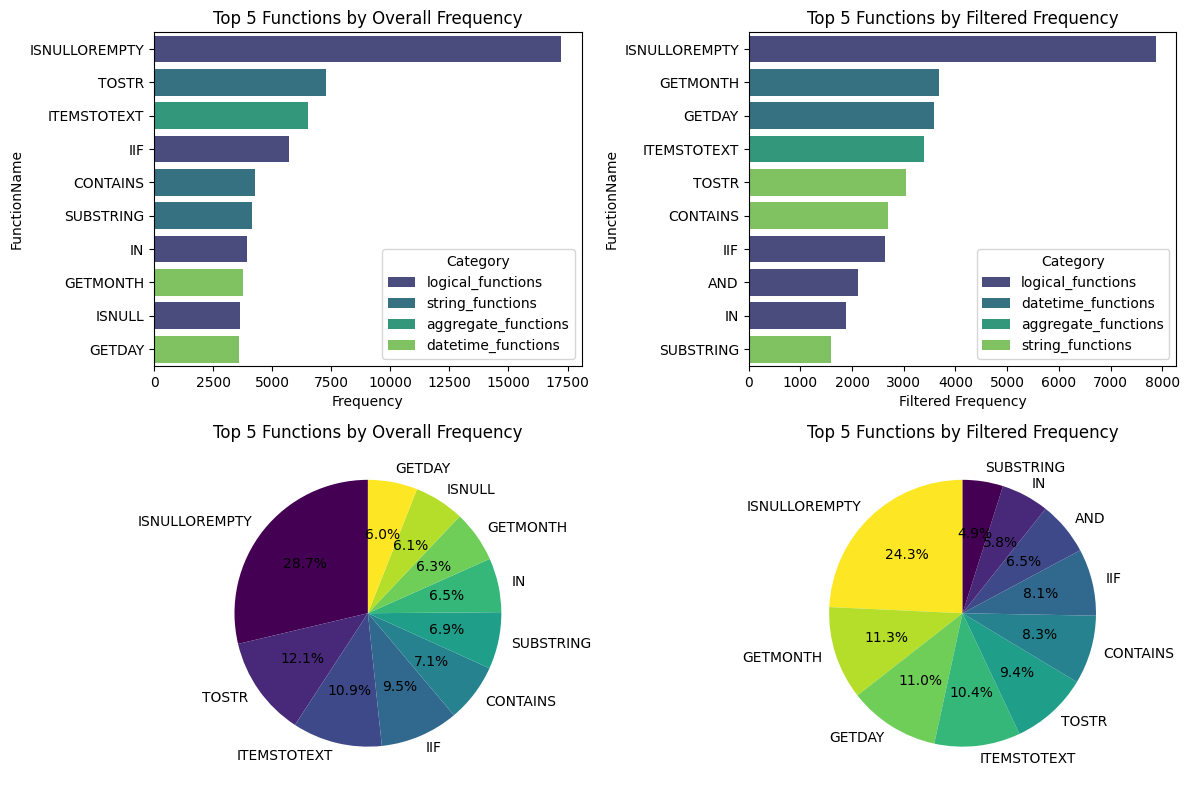

In [154]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Bar Chart for overall frequency
plt.subplot(2, 2, 1)
sns.barplot(
    data=freq_top_n,
    x="Frequency",
    y="FunctionName",
    hue="Category",
    palette="viridis",
    legend=True,
)
plt.title(f"Top {TOP_N} Functions by Overall Frequency")
plt.xlabel("Frequency")
plt.ylabel("FunctionName")

# Bar Chart for filtered frequency
plt.subplot(2, 2, 2)
sns.barplot(
    data=f_freq_top_n,
    x="FilteredFrequency",
    y="FunctionName",
    hue="Category",
    palette="viridis",
    legend=True,
)
plt.title(f"Top {TOP_N} Functions by Filtered Frequency")
plt.xlabel("Filtered Frequency")
plt.ylabel("FunctionName")

# Pie Chart for overall frequency
plt.subplot(2, 2, 3)
freq_top_n.set_index("FunctionName")["Frequency"].plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="viridis"
)
plt.title(f"Top {TOP_N} Functions by Overall Frequency")
plt.ylabel("")

# Pie Chart for filtered frequency
plt.subplot(2, 2, 4)
f_freq_top_n.set_index("FunctionName")["FilteredFrequency"].plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="viridis_r"
)
plt.title(f"Top {TOP_N} Functions by Filtered Frequency")
plt.ylabel("")

plt.tight_layout()
plt.show()

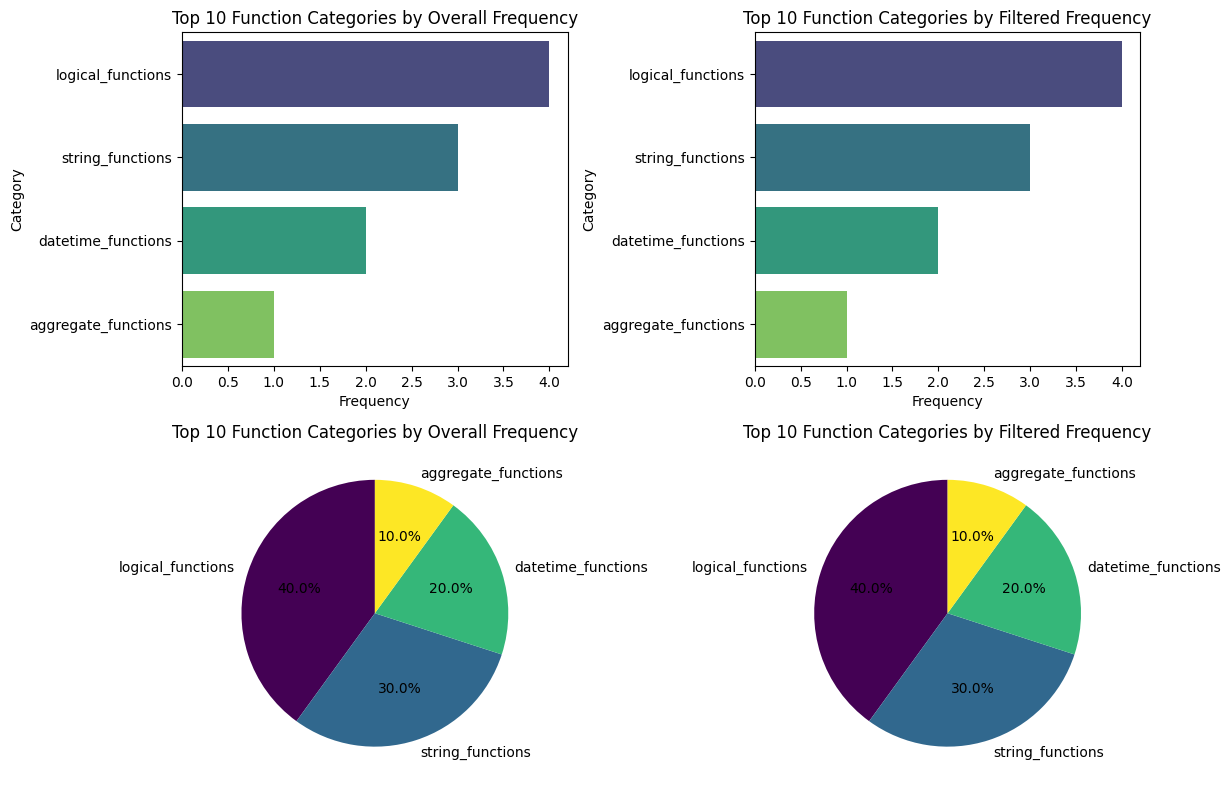

In [26]:
category_counts = freq_top_n["Category"].value_counts()
filtered_category_counts = f_freq_top_n["Category"].value_counts()

plt.figure(figsize=(12, 8))

# Bar Chart for overall frequency
plt.subplot(2, 2, 1)
sns.barplot(
    x=category_counts.values,
    y=category_counts.index,
    hue=category_counts.index,
    palette="viridis",
    legend=False,
)
plt.title(f"Top {TOP_N} Function Categories by Overall Frequency")
plt.xlabel("Frequency")
plt.ylabel("Category")

# Bar Chart for filtered frequency
plt.subplot(2, 2, 2)
sns.barplot(
    x=filtered_category_counts.values,
    y=filtered_category_counts.index,
    hue=filtered_category_counts.index,
    palette="viridis",
    legend=False,
)
plt.title(f"Top {TOP_N} Function Categories by Filtered Frequency")
plt.xlabel("Frequency")
plt.ylabel("Category")

# Pie Chart for overall frequency
plt.subplot(2, 2, 3)
category_counts.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    cmap="viridis",
)
plt.title(f"Top {TOP_N} Function Categories by Overall Frequency")
plt.ylabel("")

# Pie Chart for filtered frequency
plt.subplot(2, 2, 4)
filtered_category_counts.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    cmap="viridis",
)
plt.title(f"Top {TOP_N} Function Categories by Filtered Frequency")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Plots for all functions

More detailed analysis of the function usage

In [102]:
df_filtered = df_s[df_s["Category"] != "unknown_functions"]
df_filtered


df_filtered = (
    df_filtered.groupby("Category")
    .head(None)
    .sort_values(by="FilteredFrequency", ascending=False)
)

/tmp/ipykernel_15050/3757810912.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(top_n, "FilteredFrequency"), include_groups=True)


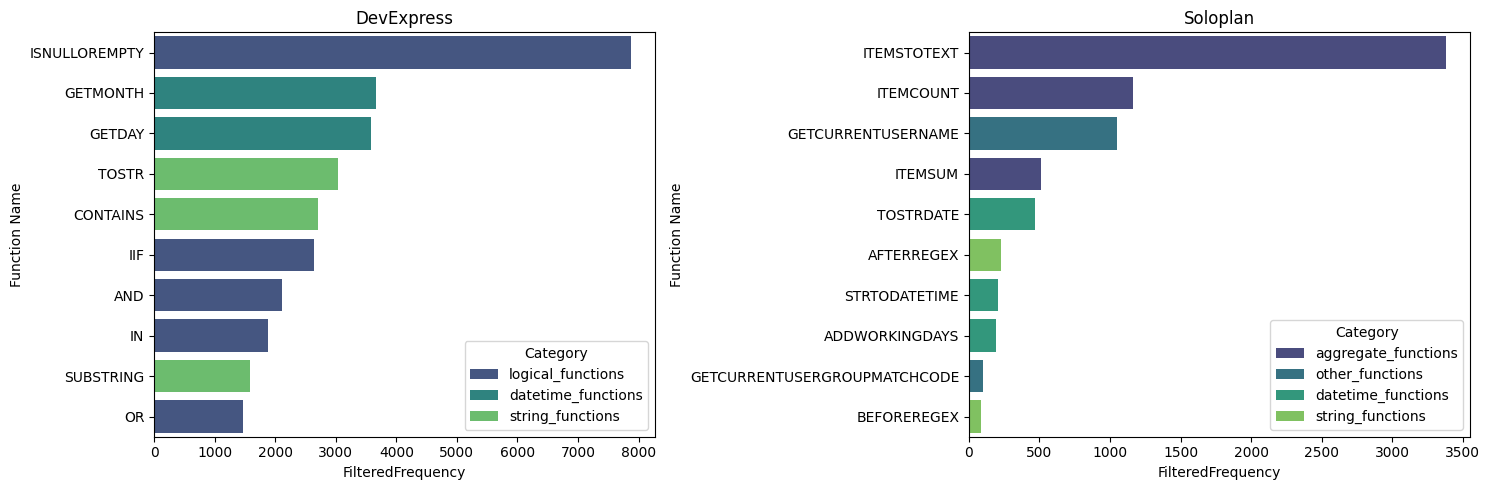

In [113]:
import math

top_n = 10

# Get the top N functions per source
top_functions_per_source = (
    df_filtered.groupby("Source")
    .apply(lambda x: x.nlargest(top_n, "FilteredFrequency"), include_groups=True)
    .reset_index(drop=True)
)

# Get the unique sources
sources = top_functions_per_source["Source"].unique()

# Determine the number of rows and columns for the subplots
num_sources = len(sources)
cols = 2  # Number of columns for subplots
rows = math.ceil(num_sources / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each source in its subplot
for i, source in enumerate(sources):
    ax = axes[i]
    subset = top_functions_per_source[top_functions_per_source["Source"] == source]
    sns.barplot(
        data=subset,
        x="FilteredFrequency",
        y="FunctionName",
        hue="Category",
        palette="viridis",
        ax=ax,
    )
    ax.set_title(f"{source}")
    ax.set_xlabel("FilteredFrequency")
    ax.set_ylabel("Function Name")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

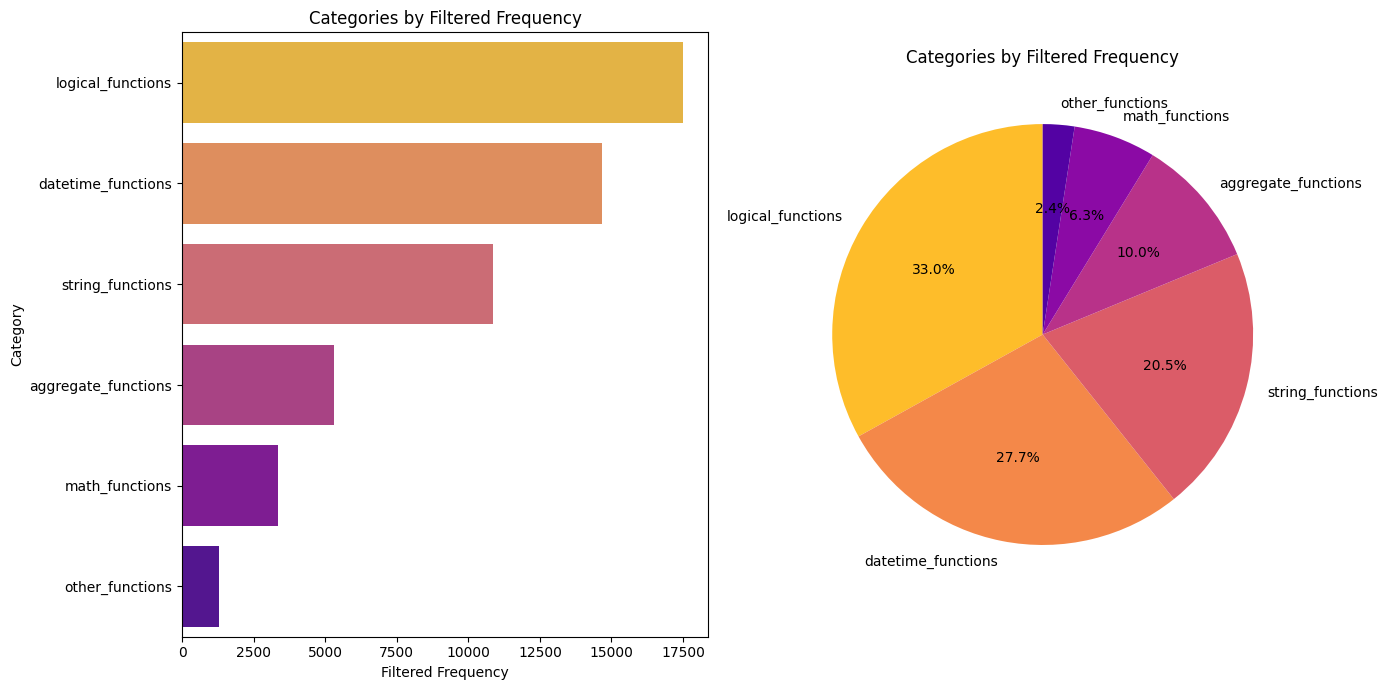

In [145]:
from pandas import DataFrame
from matplotlib.colors import ListedColormap

sum_df: DataFrame = df_filtered.groupby("Category").sum().reset_index()
sum_df = sum_df.sort_values(by="FilteredFrequency", ascending=False)

# Create a colormap
unique_categories = sum_df["Category"].unique()
cmap = ListedColormap(sns.color_palette("plasma_r", len(unique_categories)))

# Create a dictionary to map categories to colors
color_dict = {cat: cmap(i) for i, cat in enumerate(unique_categories)}

# Use the color_dict for both "FilteredFrequency" bar plot and pie chart
category_colors = sum_df["Category"].map(color_dict).tolist()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(
    data=sum_df,
    x="FilteredFrequency",
    y="Category",
    hue="Category",
    palette=category_colors,
    legend=False,
)
plt.title("Categories by Filtered Frequency")
plt.xlabel("Filtered Frequency")
plt.ylabel("Category")

plt.subplot(1, 2, 2)
sum_df.set_index("Category")["FilteredFrequency"].plot.pie(
    autopct="%1.1f%%", startangle=90, colors=category_colors
)
plt.title("Categories by Filtered Frequency")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [128]:
# create dataframe with top 5 function per category from df_filtered
top_functions_per_category = (
    df_filtered.groupby("Category")
    .head(5)
    .sort_values(by="Category", ascending=True)
)
top_functions_per_category

,FunctionName,Frequency,FilteredFrequency,Category,Source
8,ITEMSTOTEXT,6536,3382,aggregate_functions,Soloplan
49,SUM,216,63,aggregate_functions,DevExpress
53,COUNT,416,91,aggregate_functions,DevExpress
16,ITEMSUM,957,510,aggregate_functions,Soloplan
43,ITEMCOUNT,2903,1162,aggregate_functions,Soloplan
5,ADDHOURS,998,685,datetime_functions,DevExpress
60,GETMONTH,3756,3672,datetime_functions,DevExpress
84,GETDAY,3605,3582,datetime_functions,DevExpress
4,NOW,1743,801,datetime_functions,DevExpress
34,TODAY,1689,692,datetime_functions,DevExpress


In [106]:
# create dataframe with top 3 function per category from df_filtered for Source == Soloplan
top_functions_per_category_soloplan = (
    df_filtered[df_filtered["Source"] == "Soloplan"]
    .groupby("Category")
    .head(3)
    .sort_values(by="Category", ascending=True)
)
top_functions_per_category_soloplan

,FunctionName,Frequency,FilteredFrequency,Category,Source
8,ITEMSTOTEXT,6536,3382,aggregate_functions,Soloplan
43,ITEMCOUNT,2903,1162,aggregate_functions,Soloplan
16,ITEMSUM,957,510,aggregate_functions,Soloplan
10,TOSTRDATE,1035,469,datetime_functions,Soloplan
78,STRTODATETIME,706,205,datetime_functions,Soloplan
75,ADDWORKINGDAYS,420,190,datetime_functions,Soloplan
96,ISENUM,6,6,logical_functions,Soloplan
89,ISHOLIDAY,16,6,logical_functions,Soloplan
135,GEOCOORDINATEISEMPTY,10,1,logical_functions,Soloplan
39,GENERATENEXTNUMBERFROMNUMBERRANGE,207,76,math_functions,Soloplan
